# Calculating the Accuracy of the Model

Using the same dataset, expand the model by including all other features into the regression. 

Moreover, calculate the accuracy of the model and create a confusion matrix

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
raw_data=pd.read_csv("Bank-data.csv")
raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [3]:
df=raw_data.rename(columns={"y":"exito"}).copy()


In [4]:
df=df.drop(columns=["Unnamed: 0"])
df.head()


,interest_rate,credit,march,may,previous,duration,exito
0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4.856,0.0,1.0,0.0,0.0,157.0,no


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [137]:
x=df["duration"]
y=df["exito"].map({"yes":1, "no":0})

In [13]:
x_const=sm.add_constant(x)


In [14]:
Log_reg_mod=sm.Logit(y, x_const)
res_reg_log=Log_reg_mod.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [106]:
res_reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  exito   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Fri, 10 Oct 2025   Pseudo R-squ.:                  0.2121
Time:                        09:37:27   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [15]:
b0=res_reg_log.params[0]
b1=res_reg_log.params[1]

C:\Users\CHOPPE\AppData\Local\Temp\ipykernel_19576\662050382.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0=res_reg_log.params[0]
C:\Users\CHOPPE\AppData\Local\Temp\ipykernel_19576\662050382.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1=res_reg_log.params[1]


In [9]:
def array_reg_log(x,b0,b1):
    return np.exp(b0+b1*x)/(1+np.exp(b0+b1*x))

In [16]:
y_predict=array_reg_log(x,b0, b1)
y_predict.describe

<bound method NDFrame.describe of 0      0.249369
1      0.425713
2      0.300195
3      0.858983
4      0.289566
         ...   
513    0.341365
514    0.918365
515    0.445822
516    0.672160
517    0.274049
Name: duration, Length: 518, dtype: float64>

In [ ]:
#Presento los resultados de prediccion en base al modelo optimizado sm.Logit con fit() el modelo ya optimizado es capaz de generar resultados de prediccion con X como input
array_resultado=res_reg_log.predict()
res_redondeados=np.round(array_resultado).astype(int)
res_redondeados

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
#Presento el Target en forma de Array para poder posteriormente calcular la matrix de confusion
y_target=np.array(y)
y_target

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [34]:
#Calculo la matriz de Confusion 
array_confusion=res_reg_log.pred_table()
array_confusion


array([[204.,  55.],
       [104., 155.]])

In [67]:
#Convertir esto en una matriz y posteriormente calcular el accuracy
Conf_Matrix=pd.DataFrame(array_confusion)
Conf_Matrix.columns=["Predicted 0", "Predicted 1"]
Conf_Matrix=Conf_Matrix.rename(index={"0": "Actual 0", "1": "Actual 1"})

In [70]:
#Ejemplo como acceder a una celda
Conf_Matrix.loc[0, "Predicted 1"]


np.float64(55.0)

In [129]:
#"Calculo de acc con un Dataframe como input"
def calculo_acc(Matrix):
    Total_muestras=Matrix.sum().sum()
    Pred_corr=Matrix.loc[0,"Predicted 0"]+Matrix.loc[1,"Predicted 1"]
    acc=Pred_corr/Total_muestras
    return acc

In [80]:
# Llamamos la funcion 
Acc_res=calculo_acc(Conf_Matrix)
print(f"El resultado del accuracy al comparar la matrix predicted vs la matrix del target es igual a {round(Acc_res,2)}%")

El resultado del accuracy al comparar la matrix predicted vs la matrix del target es igual a 0.69%


### Simple Logistic Regression

Run the regression and graph the scatter plot.

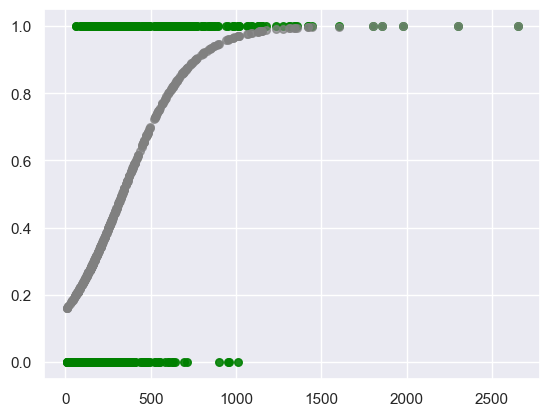

In [ ]:
#Como se puede ver aqui estoy ploteando en verde primero los valores reales del Target y en gris mi prediccion
plt.scatter(x, y, s=30, marker="o", c="green", alpha=0.9)

plt.scatter(x, pd.DataFrame(y_predict), s=30, marker="o", c="grey", alpha=0.7)
plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [84]:
#Vamos a expandir el modelo para ver si al incluir otras variables en el modelo. El modelo mejora 
df.head()

,interest_rate,credit,march,may,previous,duration,exito
0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [100]:
x=df[["interest_rate", "march", "credit", "previous", "duration"]]
y=df["exito"].map({"no":0, "yes":1})
type(x)
type(y)

pandas.core.series.Series

In [101]:
x_const=sm.add_constant(x)
type(x_const)

pandas.core.frame.DataFrame

In [105]:
modelo=sm.Logit(y, x_const)
res_modelo=modelo.fit()
res_modelo.summary()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  exito   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Fri, 10 Oct 2025   Pseudo R-squ.:                  0.5143
Time:                        09:36:50   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
credit            2.3585      1.088      2.169      0.030       0.227       4.490
previous          1.5363      0.501      3.067      0.002       0.554       2.518
duration          0.0070      0.001      9.381      0.000       0.006       0.008
=================================================================================
"""

In [ ]:
#Transformo el array que me devuelve el predict mejor dicho lo redondeo
resultado_binario=np.round(res_modelo.predict()).astype(int)
resultado_binario

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,

In [117]:
y_target

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [132]:
#Matrix de confusion segun el modelo con las multiples variables independientes
array_confusion=res_modelo.pred_table()
df_confusion=pd.DataFrame(array_confusion)
df_confusion.columns=["Predicted 0", "Predicted 1"]
df_confusion=df_confusion.rename(index={"0":"actual 0", "1":"actual 1"})
df_confusion.head()

,Predicted 0,Predicted 1
0,218.0,41.0
1,30.0,229.0


### Confusion Matrix

In [134]:
#Resultados matrix de confusion 
acc_res_multiples_var= calculo_acc(df_confusion)
print(f"El valor del calculo de accuracy segun la matrix de confusion es el siguiente {round(acc_res_multiples_var,2)}%")

El valor del calculo de accuracy segun la matrix de confusion es el siguiente 0.86%


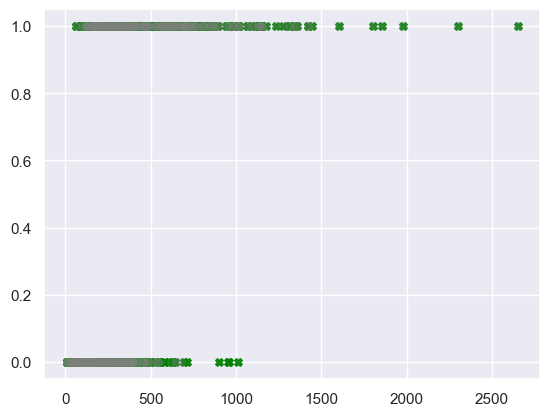

In [144]:
#Graficamos nuevamenta los resultados para comprobar que en efecto la curva de prediccion se acerque mas a los resultados 
plt.scatter(x, y, s=30, c="green", marker="X", alpha=0.9)
plt.scatter(x, pd.DataFrame(resultado_binario), s=30, c="grey", marker="o", alpha=0.2)
plt.show()

Create the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [11]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [12]:
## Ejemplo asignacion de vendedor por secuencia 
import shelve

# Lista de vendedores en orden de rotación
VENDEDORES = ["Kevin", "Oscar", "Pablo"]

def asignar_oportunidad():
    """
    Asigna un vendedor a la siguiente oportunidad de manera secuencial (round-robin)
    y guarda el número de la última oportunidad asignada de forma persistente.
    """
    with shelve.open("oportunidades_data") as db:
        # Recuperar el número actual o iniciar en 0 si no existe
        numero = db.get("numero_oportunidad", 0)

        # Calcular el vendedor según el orden. Al dividir el numero entre la longitud de la lista es decir 3 el resto de la division o es 1 o es 2 o es 0
        vendedor = VENDEDORES[numero % len(VENDEDORES)]

        # Incrementar el número para la siguiente oportunidad
        db["numero_oportunidad"] = numero + 1

    print(f"Oportunidad #{numero + 1} asignada a {vendedor}")
    return vendedor


# Ejemplo de uso
if __name__ == "__main__":
    for _ in range(20):
        asignar_oportunidad()

Oportunidad #31 asignada a Kevin
Oportunidad #32 asignada a Oscar
Oportunidad #33 asignada a Pablo
Oportunidad #34 asignada a Kevin
Oportunidad #35 asignada a Oscar
Oportunidad #36 asignada a Pablo
Oportunidad #37 asignada a Kevin
Oportunidad #38 asignada a Oscar
Oportunidad #39 asignada a Pablo
Oportunidad #40 asignada a Kevin
Oportunidad #41 asignada a Oscar
Oportunidad #42 asignada a Pablo
Oportunidad #43 asignada a Kevin
Oportunidad #44 asignada a Oscar
Oportunidad #45 asignada a Pablo
Oportunidad #46 asignada a Kevin
Oportunidad #47 asignada a Oscar
Oportunidad #48 asignada a Pablo
Oportunidad #49 asignada a Kevin
Oportunidad #50 asignada a Oscar
